<a href="https://colab.research.google.com/github/Amritanshu1122/BV/blob/main/SalesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
df = pd.read_csv("/content/online_retail.csv", encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [21]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [22]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [23]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

In [24]:
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalSales'].sum().reset_index()

daily_sales.columns = ['date', 'sales']
daily_sales['date'] = pd.to_datetime(daily_sales['date'])

daily_sales.head()

,date,sales
0,2010-12-01,58960.79
1,2010-12-02,47748.38
2,2010-12-03,46943.71
3,2010-12-05,31774.95
4,2010-12-06,54830.46


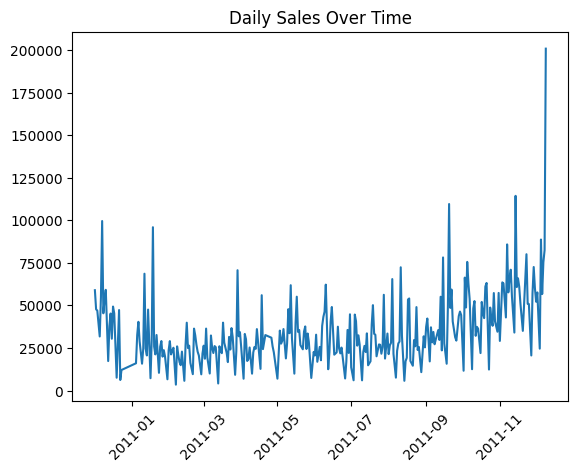

In [25]:
plt.figure()
plt.plot(daily_sales['date'], daily_sales['sales'])
plt.title("Daily Sales Over Time")
plt.xticks(rotation=45)
plt.show()

In [26]:
prophet_df = daily_sales.rename(columns={'date':'ds', 'sales':'y'})

In [27]:
train = prophet_df[:-60]
test = prophet_df[-60:]

In [28]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

model.fit(train)

In [29]:
future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)

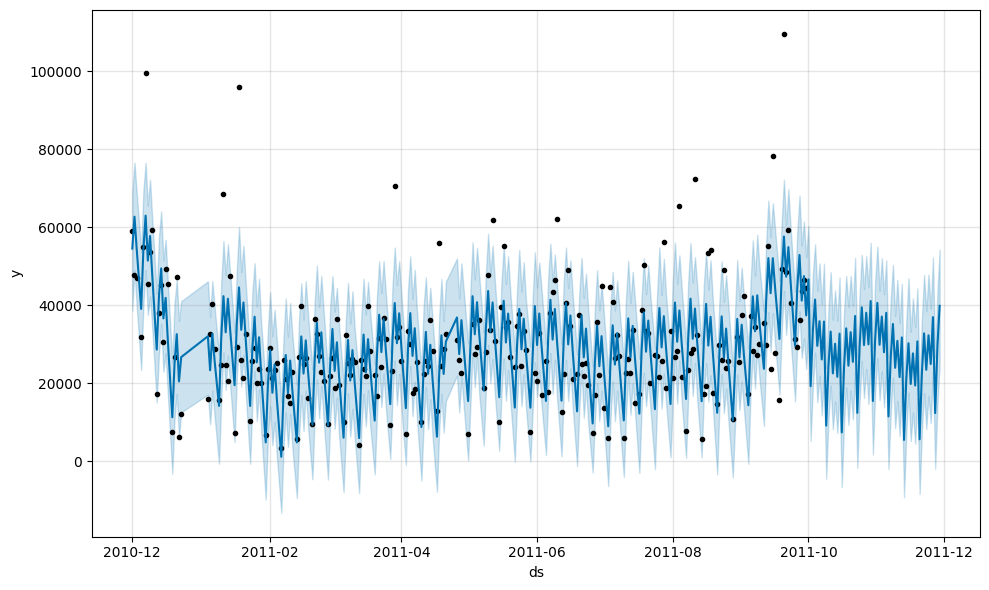

In [30]:
model.plot(forecast)
plt.show()

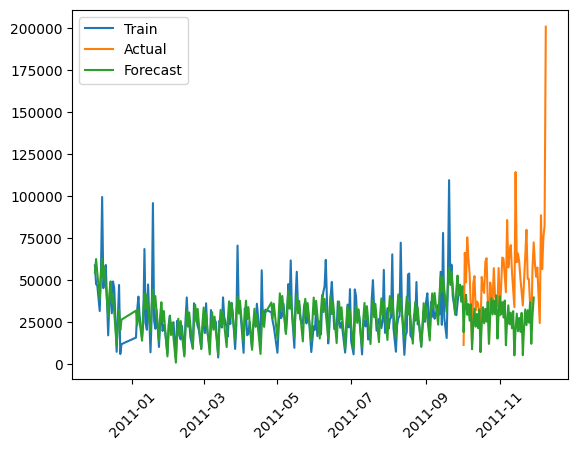

In [31]:
plt.figure()

plt.plot(train['ds'], train['y'], label='Train')
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')

plt.legend()
plt.xticks(rotation=45)
plt.show()

In [32]:
predicted = forecast['yhat'][-60:].values

mae = mean_absolute_error(test['y'], predicted)
rmse = np.sqrt(mean_squared_error(test['y'], predicted))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 30369.598399347866
RMSE: 39126.36301039175


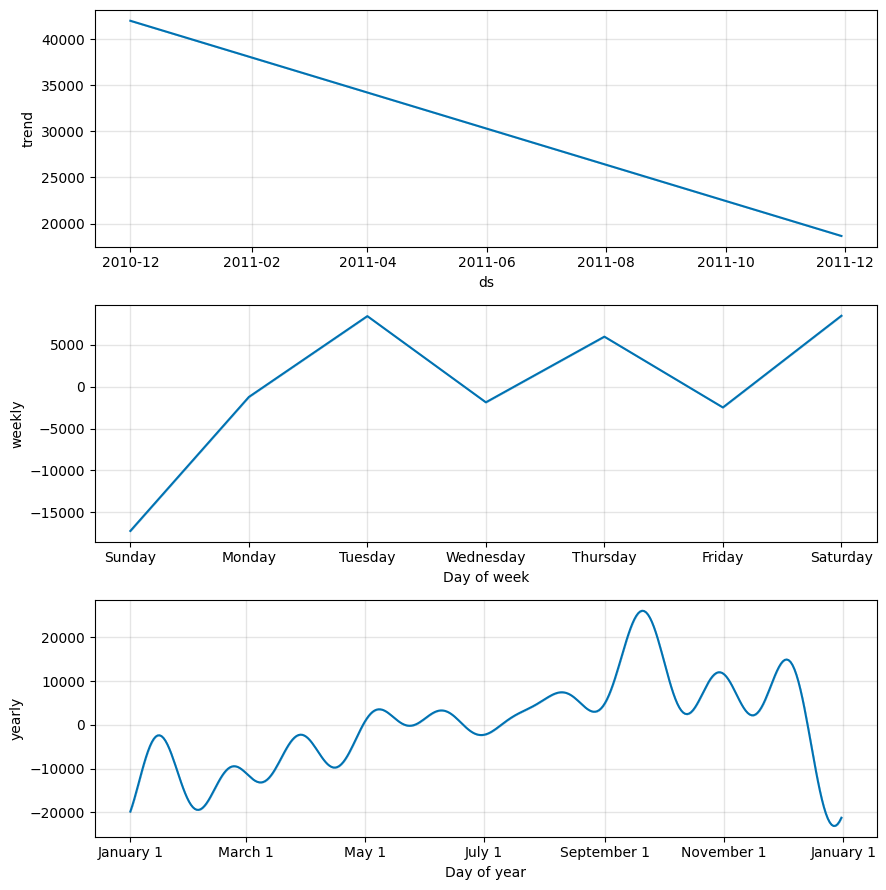

In [33]:
model.plot_components(forecast)
plt.show()